<a href="https://colab.research.google.com/github/yuvaravii/Telecom_churn_analysis_capstone1/blob/main/Cricket_Scorecard_Self_Project_Ravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b> The International Cricket Council (ICC) is the world governing body of cricket. It was founded as the Imperial Cricket Conference in 1909 by representatives from Australia, England and South Africa. It was renamed as the International Cricket Conference in 1965, and took up its current name in 1989. It organises world championship events such as Cricket World Cup, Women's Cricket World Cup, ICC T20 World Cup, ICC Women's T20 World Cup, ICC Champions Trophy and Under-19 Cricket World Cup.</b>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. </b>

<br>

## <u><b>Further you are required to do some analyses :</b></u>
* ### Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date
* ### Find out the top three venues which hosted the greatest number of matches.
* ### Find out the pair of cricket teams who played the most number of T20 matches against each other.
* ### Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.
* ### Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.




# <b><center> A sample scorecard </center></b>

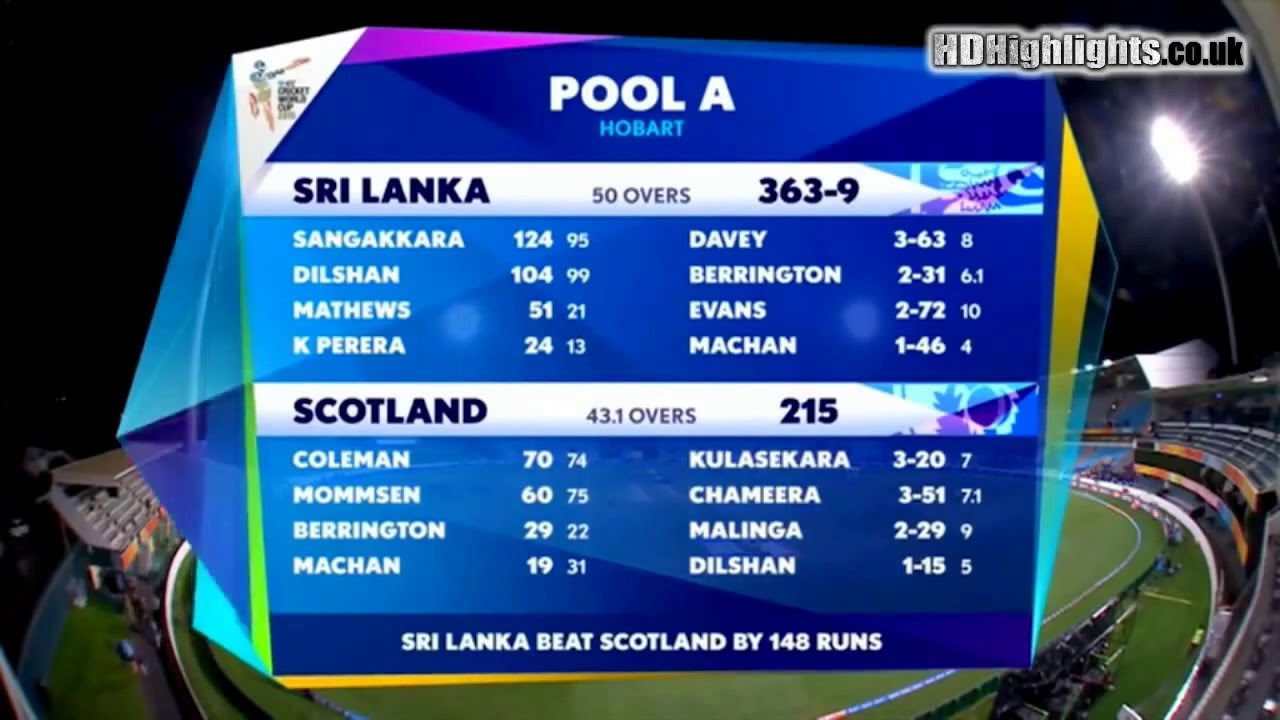

In [ ]:
#Import package
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/Python self project data/International_T20_Data.csv'
original_df = pd.read_csv(working_directory)
df=original_df.copy()

In [ ]:
df.iloc[22:25,:]

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
22,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2016-08-31,1,"[datetime.date(2016, 8, 28)]",male,T20,NaN,NaN,20,NaN,"['India', 'West Indies']",field,India,"['LS Reifer', 'JS Wilson']",Central Broward Regional Park Stadium Turf Ground,Lauderhill,NaN,NaN,1.0,NaN,no result,NaN,NaN,NaN,NaN,NaN
23,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-17,1,"[datetime.date(2017, 2, 17)]",female,T20,NaN,Australia,20,['EJ Villani'],"['Australia', 'New Zealand']",field,New Zealand,"['GA Abood', 'SAJ Craig']",Melbourne Cricket Ground,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,"[{'1st innings': {'team': 'New Zealand', 'deli...",0.9,2017-02-19,1,"[datetime.date(2017, 2, 19)]",female,T20,NaN,New Zealand,20,['AM Peterson'],"['Australia', 'New Zealand']",field,Australia,"['SAJ Craig', 'JD Ward']","Simonds Stadium, South Geelong",Victoria,8.0,NaN,NaN,D/L,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
original_df.head(2)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['innings', 'meta.data_version', 'meta.created', 'meta.revision',
       'info.dates', 'info.gender', 'info.match_type',
       'info.outcome.by.wickets', 'info.outcome.winner', 'info.overs',
       'info.player_of_match', 'info.teams', 'info.toss.decision',
       'info.toss.winner', 'info.umpires', 'info.venue', 'info.city',
       'info.outcome.by.runs', 'info.match_type_number', 'info.neutral_venue',
       'info.outcome.method', 'info.outcome.result', 'info.outcome.eliminator',
       'info.supersubs.New Zealand', 'info.supersubs.South Africa',
       'info.bowl_out', 'info.outcome.bowl_out'],
      dtype='object')

In [ ]:
df['meta.data_version'][0]

0.9

##Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date


In [ ]:
df = df.rename(columns = {'meta.data_version': 'data_version', 'meta.created': 'data_created_date','meta.revision':'data_revision',
                          'info.dates':'match_date','info.gender':'player_gender','info.match_type':'match_format',
                          'info.outcome.by.wickets':'outcome_by_wickets','info.outcome.winner':'winning_team',
                          'info.overs':'num_of_overs','info.player_of_match':'man_of_match','info.teams':'teams_played',
                          'info.toss.decision':'toss_decision','info.toss.winner':'toss_winning_team','info.umpires':'umpire_names',
                          'info.venue':'place_of_match','info.city':'city_of_match','info.outcome.by.runs':'outcome_by_runs'}, inplace = False).copy()

In [ ]:
df.head(3)

,innings,data_version,data_created_date,data_revision,match_date,player_gender,match_format,outcome_by_wickets,winning_team,num_of_overs,man_of_match,teams_played,toss_decision,toss_winning_team,umpire_names,place_of_match,city_of_match,outcome_by_runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Find out the top three venues which hosted the greatest number of matches

In [ ]:
# In order to get top three venues we have to call non null columns of venues and create a count.
# we have to know the missing values in given data set.
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      1417 non-null   object 
 1   data_version                 1417 non-null   float64
 2   data_created_date            1417 non-null   object 
 3   data_revision                1417 non-null   int64  
 4   match_date                   1417 non-null   object 
 5   player_gender                1417 non-null   object 
 6   match_format                 1417 non-null   object 
 7   outcome_by_wickets           651 non-null    float64
 8   winning_team                 1372 non-null   object 
 9   num_of_overs                 1417 non-null   int64  
 10  man_of_match                 1255 non-null   object 
 11  teams_played                 1417 non-null   object 
 12  toss_decision                1417 non-null   object 
 13  toss_winning_team 

(None, (1417, 27))

In [ ]:
type(eval(df['teams_played'][0]))

list

In [ ]:
# Ouput for 'Find out the top three venues which hosted the greatest number of matches'
df.groupby('place_of_match').count()['innings'].reset_index().sort_values(by=['innings'],ascending=False).iloc[0:3,:]

,place_of_match,innings
45,Dubai International Cricket Stadium,62
146,Sheikh Zayed Stadium,41
147,Shere Bangla National Stadium,39


##Find out the pair of cricket teams who played the most number of T20 matches against each other.


In [ ]:
# group by pair of cricket teams(teams played), most number of t20 = extract the t20 match from data set-count and sort.
#output for 'Find out the pair of cricket teams who played the most number of T20 matches against each other.'
extracted_dataframe=df[df['match_format']=='T20']
extracted_dataframe.groupby('teams_played').count().reset_index().sort_values(by=['innings'],ascending=False).iloc[0:3,:][['teams_played','innings']]

,teams_played,innings
94,"['England', 'Pakistan']",29
23,"['Australia', 'Pakistan']",26
89,"['England', 'Australia']",25


##Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.

In [ ]:
#create a new column of win %= No.of matches won/No.of matches played *100
# No. of matches won = winning_team.count
# No. of matches played= count team in teams_played column
# create a column with win %
df.head(2)

,innings,data_version,data_created_date,data_revision,match_date,player_gender,match_format,outcome_by_wickets,winning_team,num_of_overs,man_of_match,teams_played,toss_decision,toss_winning_team,umpire_names,place_of_match,city_of_match,outcome_by_runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# No. of matches won = winning_team.count
win_teams_df=df.groupby('winning_team').count()['innings'].reset_index()
win_teams_df.rename(columns={'innings':'num_of_matches_won','winning_team':'team'},inplace=True)

In [ ]:
def firstvaluelist(inputlist):
    return eval(inputlist)[0]

In [ ]:
# Create the frequency map of each team
freq_dict={}
for index,row in df.iterrows():
  team_played=eval(row['teams_played'])
  for elm in team_played:
    if elm in freq_dict.keys():
       freq_dict[elm]=  freq_dict[elm]+1
    else:
      value=1
      freq_dict[elm]=value
print(freq_dict)
# No. of matches played= count team in teams_played column

{'Australia': 214, 'Sri Lanka': 182, 'Ireland': 128, 'Hong Kong': 50, 'Zimbabwe': 76, 'India': 204, 'New Zealand': 190, 'Bangladesh': 137, 'South Africa': 192, 'England': 216, 'West Indies': 195, 'Afghanistan': 75, 'Pakistan': 226, 'United Arab Emirates': 56, 'Scotland': 67, 'Netherlands': 80, 'Oman': 35, 'Papua New Guinea': 35, 'ICC World XI': 4, 'Nepal': 40, 'Thailand': 35, 'Uganda': 13, 'Malaysia': 35, 'Botswana': 16, 'Lesotho': 4, 'Malawi': 3, 'Namibia': 34, 'Sierra Leone': 7, 'Mozambique': 6, 'China': 9, 'Kuwait': 12, 'Philippines': 4, 'Vanuatu': 12, 'United States of America': 14, 'Germany': 17, 'Italy': 4, 'Kenya': 30, 'Nigeria': 11, 'Tanzania': 3, 'Rwanda': 6, 'Indonesia': 3, 'Japan': 6, 'Fiji': 3, 'Samoa': 2, 'Canada': 23, 'Ghana': 4, 'Guernsey': 6, 'Denmark': 6, 'Norway': 4, 'Jersey': 10, 'Maldives': 10, 'Mali': 1, 'Singapore': 18, 'Qatar': 6, 'South Korea': 2, 'Bermuda': 12, 'Cayman Islands': 6, 'Spain': 6, 'Portugal': 3, 'Gibraltar': 3, 'Bhutan': 2, 'Saudi Arabia': 1, 'Bahr

In [ ]:
# No. of matches played= count team in teams_played column
num_of_matches_played_df=pd.DataFrame(freq_dict.items(),columns=['team','total_matches'])
num_of_matches_played_df

,team,total_matches
0,Australia,214
1,Sri Lanka,182
2,Ireland,128
3,Hong Kong,50
4,Zimbabwe,76
...,...,...
66,Luxembourg,2
67,Czech Republic,1
68,Isle of Man,1
69,Bulgaria,3


In [ ]:
team_scorecard =pd.merge(num_of_matches_played_df,win_teams_df,how='inner',left_on='team',right_on='team')
team_scorecard['win_percentage']=(team_scorecard['num_of_matches_won']/team_scorecard['total_matches'])*100

In [ ]:
# Output = Top 5 teams with highest winning percentage
team_scorecard.sort_values('win_percentage',ascending=False,inplace=True)
team_scorecard.head()

,team,total_matches,num_of_matches_won,win_percentage
53,Belgium,3,3,100.000000
50,Spain,6,5,83.333333
33,Germany,17,13,76.470588
25,Namibia,34,25,73.529412
11,Afghanistan,75,51,68.000000


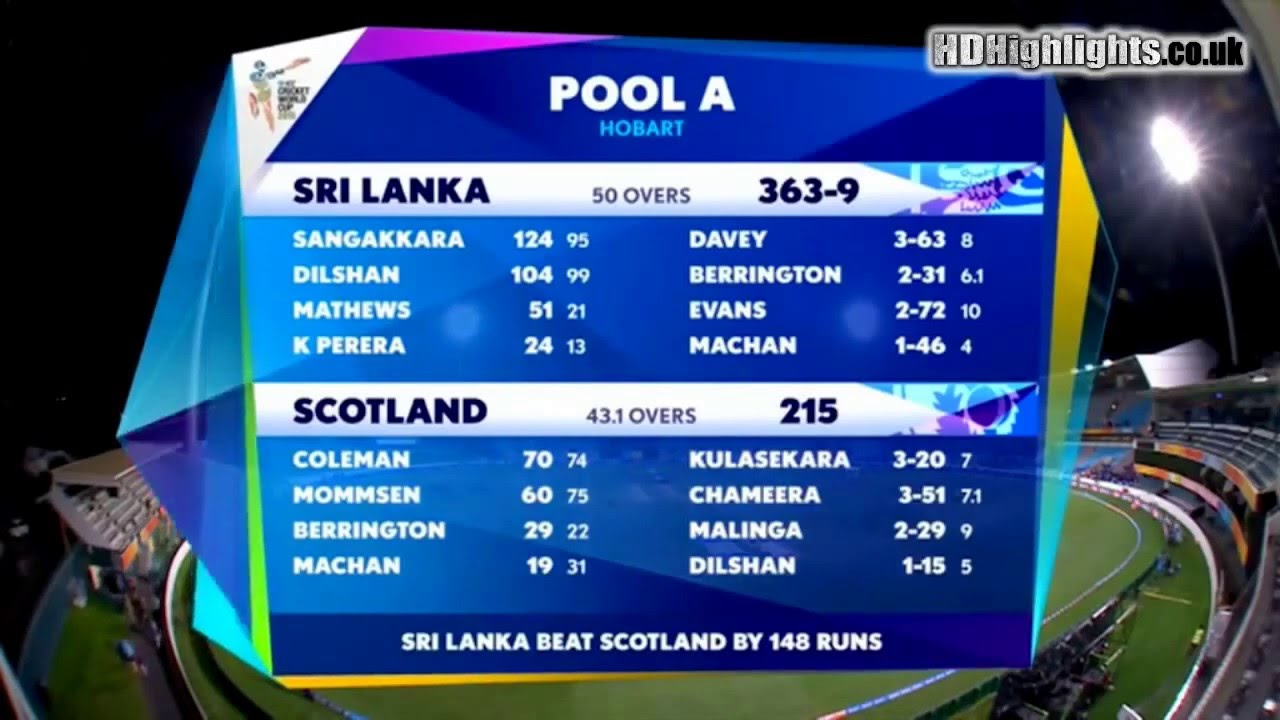

Process
1. extract the inning element convert it into two innings(1st and 2nd) 
2. extract the top 4 bowlers and top 4 bowlers from each inning

In [ ]:
df.head(2)

,innings,data_version,data_created_date,data_revision,match_date,player_gender,match_format,outcome_by_wickets,winning_team,num_of_overs,man_of_match,teams_played,toss_decision,toss_winning_team,umpire_names,place_of_match,city_of_match,outcome_by_runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#converted the innings columns from strings to list of dicts
df['innings']=df['innings'].apply(eval)

In [ ]:
df['innings'][0]

[{'1st innings': {'deliveries': [{0.1: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.2: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.3: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
    {0.4: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
    {0.5: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.6: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
    {1.1: {'batsman': 'M Klinger',
      

In [ ]:
match=df['innings'][0]
first_innings=match[0]
second_innings=match[1]
#create df of two innings - 1. first innings 2. second innings.

deliveries=second_innings['2nd innings']['deliveries']
# use a iterator for calling each delivery.replace '1' with iterator and use its key to call delivery.
deliveries[2].keys()
#output dict_keys([0.3])
batsman_name= deliveries[2][0.3]['batsman']
bowler_name= deliveries[2][0.3]['bowler']
batsman_run= deliveries[2][0.3]['runs']['batsman']
bowler_run= deliveries[2][0.3]['runs']['total']
data=[batsman_name,bowler_name,batsman_run,bowler_run]
scorecard_df= pd.DataFrame(data,index=(['batsman_name_list','bowler_name_list','batsman_run_list','bowler_run_list']))


##Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.

In [ ]:

def summary_function(input_innings):
  first_innings=input_innings[0]['1st innings']
  deliveries_for_first_innings=first_innings['deliveries']
  batsman_name_list=[]
  bowler_name_list=[]
  batsman_run_list=[]
  bowler_extra_list=[]
  bowler_total_run_list=[]
  wicket_list=[]
  wicket_taker=[]
  second_innings=input_innings[1]['2nd innings']
  deliveries_for_second_innings=second_innings['deliveries']

  #create a list of batsman
  for i in range(0,len(deliveries)):
    balls=deliveries_for_second_innings[i]
    for key,value in balls.items():
      batsman=value['batsman']
      batsman_name_list.append(batsman)
      bowler=value['bowler']
      bowler_name_list.append(bowler)
      batsman_run=value['runs']['batsman']
      batsman_run_list.append(batsman_run)
      bowler_total_run=value['runs']['total']
      bowler_total_run_list.append(bowler_total_run)
      bowler_extra=value['runs']['extras']
      bowler_extra_list.append(bowler_extra)
      if 'wicket' in value.keys():
        wicket=1
        wicket_taker.append(value['bowler'])
        wicket_list.append(wicket)
  data=[batsman_name_list,bowler_name_list,batsman_run_list,bowler_extra_list,bowler_total_run_list,wicket_list,wicket_taker]
  first_innings_df=pd.DataFrame(data,index=(['batsman_name','bowler_name','batsman_run','bowler_extra','bowler_total_run','wickets','wicket_taker']))
  first_innings_df=first_innings_df.T
  top_batsman_1st_inning=first_innings_df.groupby('batsman_name')[['batsman_run',]].sum().sort_values('batsman_run',ascending=False).head(4)
  bowler_1=first_innings_df.groupby('bowler_name')['bowler_total_run'].sum()
  bolwer_2=first_innings_df.groupby('wicket_taker',as_index=False)['wickets'].sum().copy()
  bolwer_2=bolwer_2.rename(columns={'wicket_taker':'bowler_name'})
  top_bowlers_1st_inning=pd.merge(bolwer_2,bowler_1,how='inner',left_on='bowler_name',right_on='bowler_name')

  # for second inning the above function is repeated.
  batsman_name_list=[]
  bowler_name_list=[]
  batsman_run_list=[]
  bowler_extra_list=[]
  bowler_total_run_list=[]
  wicket_list=[]
  wicket_taker=[]
  second_innings=input_innings[1]['2nd innings']
  deliveries_for_second_innings=second_innings['deliveries']

  #create a list of batsman
  for i in range(0,len(deliveries)):
    balls=deliveries_for_second_innings[i]
    for key,value in balls.items():
      batsman=value['batsman']
      batsman_name_list.append(batsman)
      bowler=value['bowler']
      bowler_name_list.append(bowler)
      batsman_run=value['runs']['batsman']
      batsman_run_list.append(batsman_run)
      bowler_total_run=value['runs']['total']
      bowler_total_run_list.append(bowler_total_run)
      bowler_extra=value['runs']['extras']
      bowler_extra_list.append(bowler_extra)
      if 'wicket' in value.keys():
        wicket=1
        wicket_taker.append(value['bowler'])
        wicket_list.append(wicket)
  data=[batsman_name_list,bowler_name_list,batsman_run_list,bowler_extra_list,bowler_total_run_list,wicket_list,wicket_taker]
  second_innings_df=pd.DataFrame(data,index=(['batsman_name','bowler_name','batsman_run','bowler_extra','bowler_total_run','wickets','wicket_taker']))
  second_innings_df=second_innings_df.T
  top_batsman_2nd_inning=second_innings_df.groupby('batsman_name')[['batsman_run',]].sum().sort_values('batsman_run',ascending=False).head(4)
  bowler_1=second_innings_df.groupby('bowler_name')['bowler_total_run'].sum()
  bolwer_2=second_innings_df.groupby('wicket_taker',as_index=False)['wickets'].sum().copy()
  bolwer_2=bolwer_2.rename(columns={'wicket_taker':'bowler_name'})
  top_bowlers_2nd_inning=pd.merge(bolwer_2,bowler_1,how='inner',left_on='bowler_name',right_on='bowler_name')
  return [top_batsman_1st_inning,top_bowlers_1st_inning,top_batsman_2nd_inning,top_bowlers_2nd_inning]


In [ ]:
input_innings=df['innings'][0]
summary_function(input_innings)

[                 batsman_run
 batsman_name                
 DAS Gunaratne             52
 EMDY Munaweera            44
 N Dickwella               30
 TAM Siriwardana           15,   bowler_name  wickets  bowler_total_run
 0     A Zampa        2                26
 1   AJ Turner        2                12
 2  PJ Cummins        1                30,                  batsman_run
 batsman_name                
 DAS Gunaratne             52
 EMDY Munaweera            44
 N Dickwella               30
 TAM Siriwardana           15,   bowler_name  wickets  bowler_total_run
 0     A Zampa        2                26
 1   AJ Turner        2                12
 2  PJ Cummins        1                30]